# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.123732e+01     6.954487e+00
 * time: 0.003365039825439453
     1     3.040109e+01     4.949354e+00
 * time: 0.015236139297485352
     2     2.319197e+01     6.119384e+00
 * time: 0.02937006950378418
     3     1.983006e+01     7.291010e+00
 * time: 0.04372715950012207
     4     1.416606e+01     4.400129e+00
 * time: 0.058646202087402344
     5     1.069982e+01     1.862787e+00
 * time: 0.0735321044921875
     6     9.922407e+00     1.763840e+00
 * time: 0.08565402030944824
     7     9.313805e+00     1.360372e+00
 * time: 0.09783720970153809
     8     8.860822e+00     1.285543e+00
 * time: 0.11002206802368164
     9     8.495831e+00     1.112551e+00
 * time: 0.1220250129699707
    10     8.256083e+00     8.342486e-01
 * time: 0.13463211059570312
    11     8.158727e+00     6.943252e-01
 * time: 0.1477370262145996
    12     8.085676e+00     5.233295e-01
 * time: 0.16118717193603516
    13     8.033960e+00     4.526456e-01
 * time:

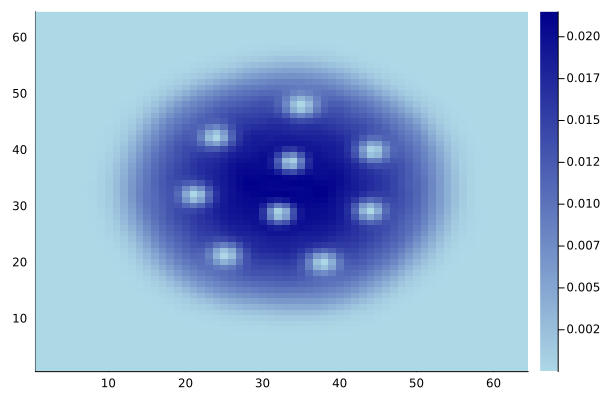

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)